# <center>Homework 1 (The Perceptron)</center>

# <center>COSC 4337 Dr. RizkCOSC 4337 Dr. Rizk</center>

# <center>Dosbol Aliev </center>

# <center> MyUH: 1867424

### Implementing the Perceptron Algorithm in Python

In this homework assignment, you are asked to implement the classic Perceptron
for binary classification (0/1 class labels). Invented in 1957 by Frank Rosenblatt at
the Cornell Aeronautical Laboratory, a perceptron is the simplest neural network
possible: a computational model of a single neuron. A perceptron consists of one
or more inputs, a processor, and a single output.


In summary, the perceptron algorithm looks as follows:<br>
● For every input, multiply that input by its weight.<br>
● Sum all of the weighted inputs.<br>
● Compute the output of the perceptron based on that sum passed through an<br>
activation function (the sign of the sum).

#### Note: You will only be allowed to use built-in python modules, numpy, and matplotlib for this homework

### Imports and Settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize


rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'tan'

### Part 1. Preparing the Data

The data file should be located in the same folder as this notebook and named data.txt. The data inside of this file is of the following form:

In [2]:
data = np.loadtxt('data.txt')
np.random.shuffle(data)

In [3]:
# AS you said about normalizing
scaler =StandardScaler()
scaler_df=scaler.fit_transform(data)

My_normalized =normalize(scaler_df)

In [4]:
X = np.delete(data, 2, 1)
print("X shape = ", X.shape)
x_train = np.array(X[:int(0.8 * len(X))])
x_test = np.array(X[int(0.8 * len(X)):])

y = np.delete(data, [0, 1], axis=1)
print("y shape = ", y.shape)
y_train = np.array(y[:int(0.8 * len(y))])
y_test = np.array(y[int(0.8 * len(y)):])

X shape =  (100, 2)
y shape =  (100, 1)


You can use the following formula to normalize the data:<br>

z=(X−μ)/σ<br>
If read correctly, the shape of X should be (100, 2) and y (100,)

### Part 2. Plotting the Data

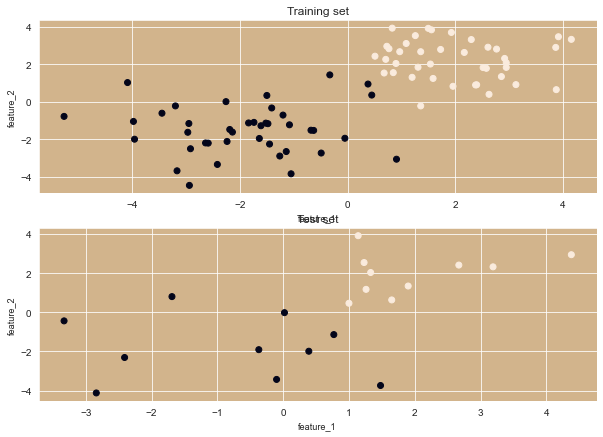

In [5]:
fig = plt.figure(figsize = (10,7))
plt.rcParams['figure.facecolor'] = 'black'
ax = fig.add_subplot(2,1,1)
ax.set_xlabel('feature_1', fontsize=9)
ax.set_ylabel('feature_2', fontsize=9)
ax.set_title('Training set', fontsize=12)
ax.scatter(x_train[:,0], x_train[:,1], c=y_train)

bx = fig.add_subplot(2,1,2)
bx.set_xlabel('feature_1', fontsize=9)
bx.set_ylabel('feature_2', fontsize=9)
bx.set_title('Test set', fontsize=12)
bx.scatter(x_test[:,0], x_test[:,1], c=y_test)

plt.show()

### Part 3. Defining the Perceptron model

Hints

See np.zeros() for initialization <br>
see np.where for predictions<br>
see np.reshape() if you need to modify dimensions<br>
Recall that a linear layer simply applies a linear transformation to the incoming data:<br>
y=x * A^T

In [6]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features + 1)
        #self.weights = self.weights.reshape(num_features + 1, 1)

    def forward(self, x):
        act = self.weights[0]
        for i in range(len(x)-1):
            linear = self.weights[i+1] * x[i]
            act += linear
        predictions = np.where(act > 0, [1.0], [0.0])[0]
        return predictions

    def backward(self, x, y):
        errors = x - y
        return errors

    def train(self, x, y, epochs):
        l_rate = 0.1
        for e in range(epochs):
            #error = self.backward(y, prediction)
            for row in x:
                prediction = self.forward(row)
                error = row[-1] - prediction
                self.weights[0]=self.weights[0] + l_rate * error
                for i in range(len(row)-1):
                    self.weights[i+1]=self.weights[i+1] + l_rate * error * row[i]

    def evaluate(self, x, y):
        correct = 0
        for i in range(len(x)):
            if x[i] > 0.0 and y[i]==1:
                correct += 1
            if x[i] <= 0.0 and y[i]==0:
                correct += 1
        accuracy = correct / float(len(x)) * 100.0
        return accuracy


### Part 4. Training the Perceptron

Using your code above, create and train the perceptron for 5 epochs.


In [7]:
model = Perceptron(2)

x_train = np.insert(x_train, 0, 1, axis=1)
x_test = np.insert(x_test, 0, 1, axis=1)

model.train(x_train, y_train, 10)
#print(model.weights)

### Part 5. Evaluating the model

Compute the prediction accuracy (in percent) for both the training set and the test set. We get around 100% train set accuracy and 93% test set accuracy.

In [8]:
xx = np.matrix(x_train) * np.matrix(model.weights).T

correct = 0
for i in range(80):
    if (xx[i,0] >= 0 and y_train[i] == 1):
        correct += 1
    if (xx[i,0] < 0 and y_train[i] == 0):
        correct += 1
    #print(xx[i,0], " ", y_train[i])

accuracy = model.evaluate(xx, y_train)
print("train correct = ", accuracy, '%')

train correct =  91.25 %


In [9]:
yy = np.matrix(x_test) * np.matrix(model.weights).T

correct = 0
for i in range(20):
    if (yy[i,0] > 0 and y_test[i] == 1):
        correct += 1
    if (yy[i,0] <= 0 and y_test[i] == 0):
        correct += 1
    #print(xx[i,0], " ", y_test[i])

accuracy = model.evaluate(yy, y_test)
print("test correct = ", accuracy, '%')

test correct =  95.0 %


### Part 6. Decision Boundary

Plot the 2d decision boundry for both your train set and test set. You should get something similar to below if implemented correctly. Left is our train set. Notice how everything is classified correctly here since we got 100% accuracy on the train set.

#### Hint: get the weights and bias from your model to create the line

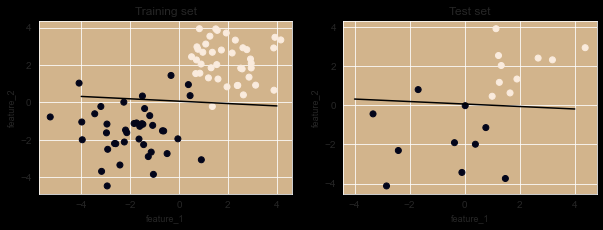

In [10]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(2,2,1)
ax.set_xlabel('feature_1', fontsize=9)
ax.set_ylabel('feature_2', fontsize=9)
ax.set_title('Training set', fontsize=12)
labels = [0,1]
ax.scatter(x_train[:,1], x_train[:,2], c=y_train)

a = model.weights[1] / model.weights[2]
xx = np.linspace(-4, 4)
yy = a * xx - (model.weights[0])
yy = a * xx - (model.weights[0] / model.weights[2])
ax.plot(xx, yy, 'k-')

bx = fig.add_subplot(2,2,2)
bx.set_xlabel('feature_1', fontsize=9)
bx.set_ylabel('feature_2', fontsize=9)
bx.set_title('Test set', fontsize=12)
bx.scatter(x_test[:,1], x_test[:,2], c=y_test)

a = model.weights[1] / model.weights[2]
xx = np.linspace(-4, 4)
yy = a * xx - (model.weights[0] / model.weights[2])
bx.plot(xx, yy, 'k-')

plt.show()

# Congrats on implementing the perceptron algorithm in Python!!! 🙂